In [1]:
import pandas as pd

df = pd.read_csv("msamd_14454.csv")
df.head()

/var/folders/kg/68h1m2rj3q7gkm6kw44ctt9c0000gn/T/ipykernel_6845/4104424442.py:3: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4448,31.27,113700,91,1016,1519,72
1,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4230,7.78,113700,179,1228,1394,60
2,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502350e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,7312,2.95,113700,132,2099,2345,43
3,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502351e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2380,77.98,113700,18,16,343,51
4,2021,549300DAUXQ2DCY4H838,14454,MA,25025.0,2.502513e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5399,69.98,113700,54,568,1437,48


By county determine how many loans were taken.

A loan being taken has a value of 1 in the 'action_taken' column

<AxesSubplot: xlabel='county_code'>

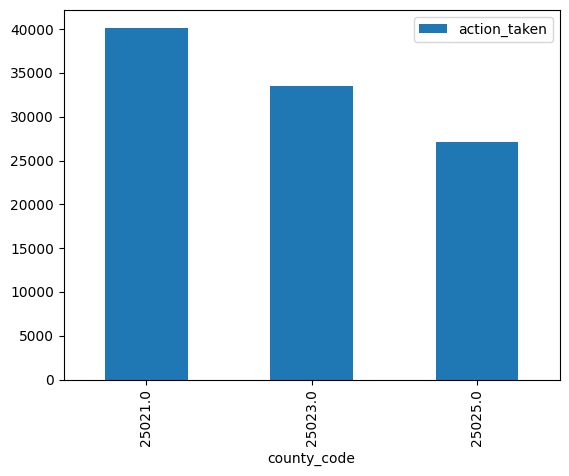

In [2]:
df3 = df[['county_code', 'action_taken']]
df3['action_taken'].map({1: 1, 2: 0}).fillna(0)
df3 = df3.query('action_taken == 1')
df3.groupby('county_code').count().plot(kind='bar')

In [3]:
county_codes_dict = {25021: 'Norfolk', 25023: 'Plymouth', 25025: 'Suffolk'}
per_county_count = df3['county_code'].value_counts()

for county_code in county_codes_dict.keys():
    print(f"{county_codes_dict[county_code]}: {per_county_count[county_code]}")

Norfolk: 40175
Plymouth: 33453
Suffolk: 27140


Establish who is participating in first time home ownership programs

In [4]:
df2 = df[['applicant_age', 'derived_dwelling_category', 'derived_race', 'income']]
df2 = df2.loc[((df['applicant_age'] == '25-34') | 
               (df['applicant_age'] == '<25')) & ((df['derived_dwelling_category'] == 'Single Family (1-4 Units):Site-Built') | 
                (df['derived_dwelling_category'] == 'Single Family (1-4 Units):Manufactured'))]
df2.head(20)

,applicant_age,derived_dwelling_category,derived_race,income
3,25-34,Single Family (1-4 Units):Site-Built,Black or African American,104.0
4,25-34,Single Family (1-4 Units):Site-Built,Race Not Available,86.0
12,25-34,Single Family (1-4 Units):Site-Built,Black or African American,49.0
15,25-34,Single Family (1-4 Units):Site-Built,Black or African American,131.0
16,25-34,Single Family (1-4 Units):Site-Built,Black or African American,NaN
26,25-34,Single Family (1-4 Units):Site-Built,White,174.0
33,25-34,Single Family (1-4 Units):Site-Built,White,110.0
34,25-34,Single Family (1-4 Units):Site-Built,Black or African American,177.0
37,25-34,Single Family (1-4 Units):Site-Built,White,75.0
40,25-34,Single Family (1-4 Units):Site-Built,Black or African American,88.0


The distribution of income for different derived race.

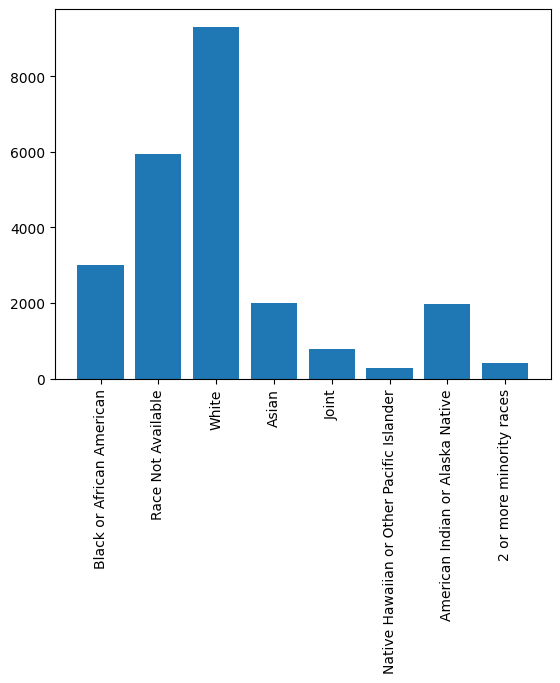

In [23]:
import matplotlib.pyplot as plt

# Drop rows with missing income
df2 = df2.dropna(subset=['income'])
df2 = df2.drop(df2[df2['income'] < 0].index)
#print(df2.isnull().sum())

plt.bar(df2['derived_race'], df2['income'])
plt.xticks(rotation=90)

plt.show()

The distribution for applicants' age and income. 

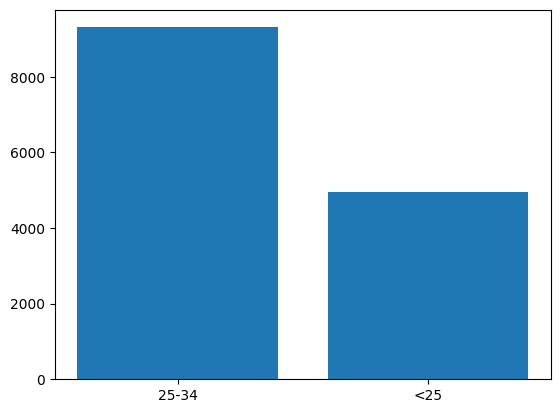

In [21]:
plt.bar(df2['applicant_age'], df2['income'])

plt.show()